In [2]:
# Analysis of Netflix Content Strategy (2008-2021)
# Author: [Sajeeha Razzaq] 
# Goal: Investigate the growth trends of Movies vs. TV Shows to identify shifts in Netflix's business model.

# 1 : Load Data
import pandas as pd
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv"
df = pd.read_csv(url)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# 2: Data Audit
print("Missing values per column:")
print(df.isnull().sum()) 
print(f"Total rows in dataset: {len(df)}")

Missing values per column:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
Total rows in dataset: 7787


In [4]:
# 3: Data Cleaning
cols_to_fix = ['director', 'cast', 'country']
for col in cols_to_fix:
    df[col] = df[col].fillna('Unknown')
df.dropna(subset=['date_added', 'rating'], inplace=True)
print(df.isnull().sum())
print(f"Cleaned Row Count: {len(df)}")
print(df.head())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
Cleaned Row Count: 7770
  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_y

In [5]:
# 5: Conversion
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0).astype(int)

In [6]:
# 5: Verification
print("--- DATE CONVERSION RESULTS ---")
print(df[['title', 'date_added', 'year_added']].head())
print("\nColumn Type for date_added:", df['date_added'].dtype) 

--- DATE CONVERSION RESULTS ---
   title date_added  year_added
0     3% 2020-08-14        2020
1   7:19 2016-12-23        2016
2  23:59 2018-12-20        2018
3      9 2017-11-16        2017
4     21 2020-01-01        2020

Column Type for date_added: datetime64[ns]


In [7]:
# 6: Summary Statistics
df_filtered = df[df["year_added"] > 0].copy()
analysis = df_filtered.groupby(['year_added', 'type'])["show_id"].count()
final_trend = analysis.unstack()
print("--- SUMMARY TABLE: CONTENT BY YEAR ---")
print(final_trend.tail(10))

--- SUMMARY TABLE: CONTENT BY YEAR ---
type         Movie  TV Show
year_added                 
2012           3.0      NaN
2013           6.0      5.0
2014          19.0      6.0
2015          58.0     30.0
2016         256.0    184.0
2017         861.0    361.0
2018        1255.0    429.0
2019        1497.0    656.0
2020        1312.0    697.0
2021          88.0     29.0


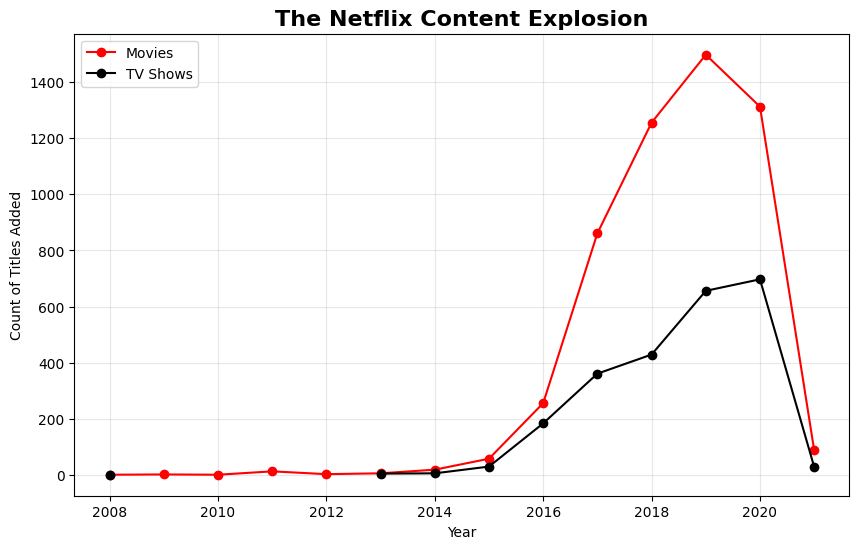

In [8]:
# 7: Visualization
import matplotlib.pyplot as plt
chart_data = final_trend[final_trend.index >= 2008]
chart_data.plot(kind='line', marker='o', figsize=(10, 6), color=['red', 'black'])
plt.title('The Netflix Content Explosion', fontsize=16, fontweight='bold')
plt.ylabel('Count of Titles Added')
plt.xlabel('Year')
plt.legend(['Movies', 'TV Shows']) # Ensures the lines are labeled
plt.grid(True, alpha=0.3)
plt.savefig('netflix_trend_analysis.png', dpi=300, bbox_inches='tight')
plt.show()